In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [9]:
cursor.execute("DELETE FROM sales")  
sample_data = [
    ('Laptop', 5, 60000),
    ('Laptop', 3, 60000),
    ('Mouse', 10, 500),
    ('Keyboard', 6, 1500),
    ('Monitor', 4, 12000),
    ('Headphones', 8, 2000)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [10]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [11]:
print("=== Sales Summary ===")
print(df)

=== Sales Summary ===
      product  total_qty   revenue
0  Headphones          8   16000.0
1    Keyboard          6    9000.0
2      Laptop          8  480000.0
3     Monitor          4   48000.0
4       Mouse         10    5000.0


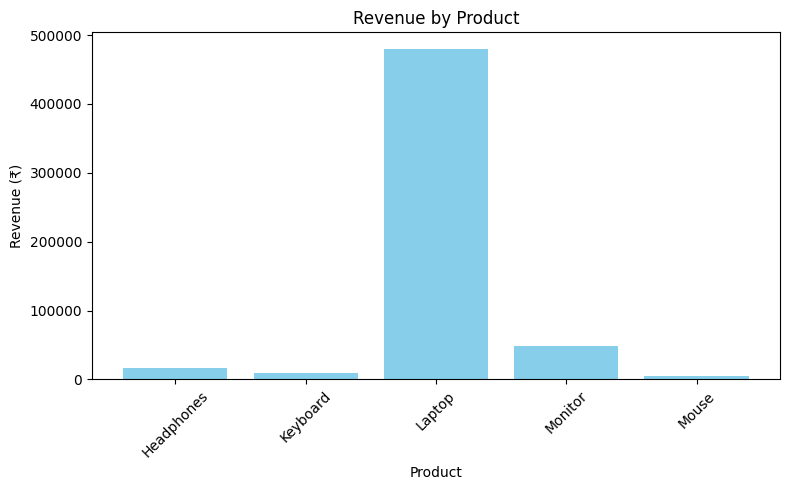

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Revenue (₹)')
plt.title('Revenue by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [14]:
conn.close()